In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [7]:
data = pd.read_csv('weatherAUS.csv')

In [8]:
data.shape
data.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [9]:
data["RainToday"].replace({"No": 0, "Yes": 1}, inplace=True)
data["RainTomorrow"].replace({"No": 0, "Yes": 1}, inplace=True)

/var/folders/2l/v4p9mr812sz7772ddx5ybr080000gn/T/ipykernel_3335/2377828732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["RainToday"].replace({"No": 0, "Yes": 1}, inplace=True)
/var/folders/2l/v4p9mr812sz7772ddx5ybr080000gn/T/ipykernel_3335/2377828732.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [10]:
data["RainToday"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
142188    0.0
142189    0.0
142190    0.0
142191    0.0
142192    0.0
Name: RainToday, Length: 142193, dtype: float64

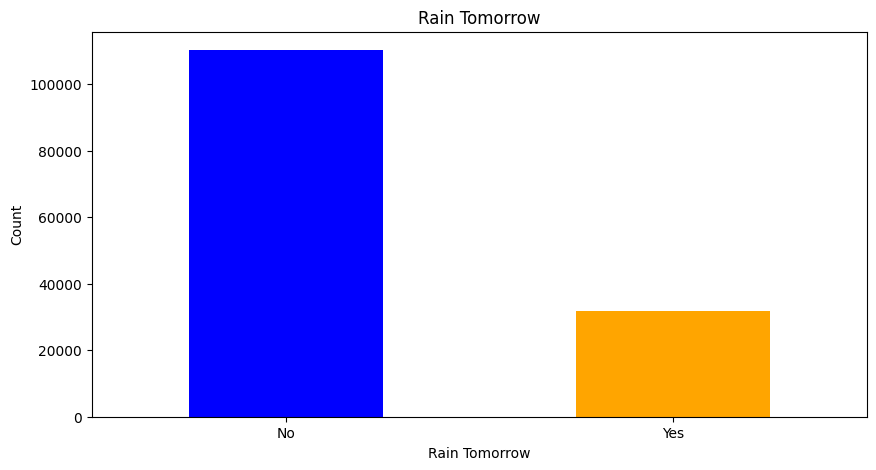

In [11]:
fig = plt.figure(figsize=(10, 5))
data.RainTomorrow.value_counts().plot(kind='bar',color=["blue", "orange"])
plt.title("Rain Tomorrow")
plt.xlabel("Rain Tomorrow")
plt.ylabel("Count")
plt.xticks([0, 1], ["No", "Yes"], rotation=0)
plt.show()

In [12]:
rain_no = data[data["RainTomorrow"] == 0]
rain_yes = data[data["RainTomorrow"] == 1]
yes_oversampled = resample(rain_yes,
                           replace= True,  # sample with replacement
                            n_samples=len(rain_no),  # to match majority class
                            random_state=123)  # reproducible results

over_sampled = pd.concat([rain_no, yes_oversampled])

In [13]:
yes_oversampled.shape

(110316, 24)

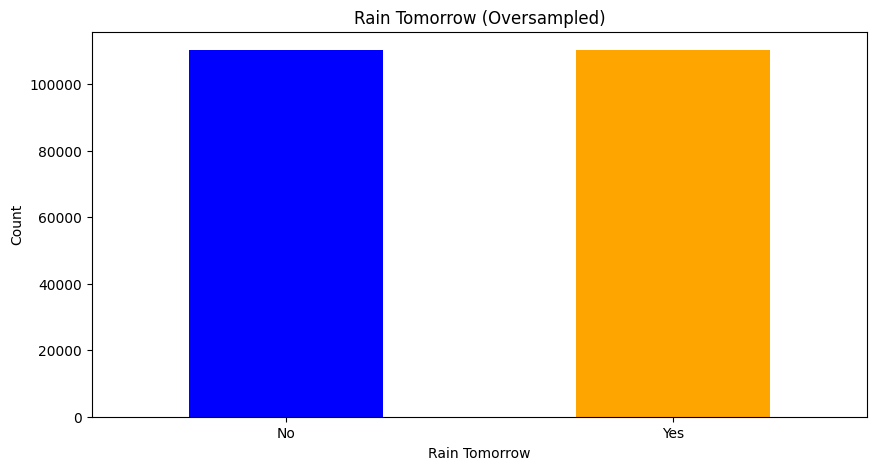

In [14]:
fig = plt.figure(figsize=(10, 5))
over_sampled.RainTomorrow.value_counts().plot(kind='bar', color=["blue", "orange"])
plt.title("Rain Tomorrow (Oversampled)")
plt.xlabel("Rain Tomorrow")
plt.ylabel("Count")
plt.xticks([0, 1], ["No", "Yes"], rotation=0)
plt.show()

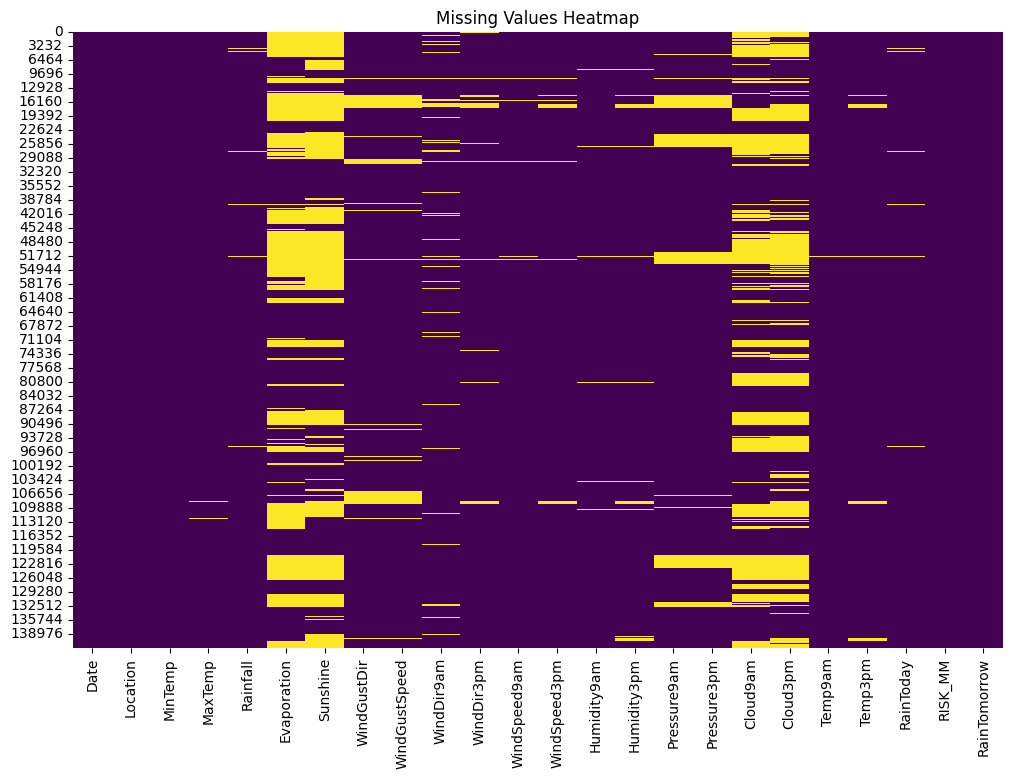

In [15]:
## missing values heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [16]:
## dealing with missing values 
total = over_sampled.isnull().sum().sort_values(ascending=False)
percent = (over_sampled.isnull().sum()/over_sampled.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Sunshine,104831,47.513960
Evaporation,95411,43.244407
Cloud3pm,85614,38.803981
Cloud9am,81339,36.866366
Pressure3pm,21746,9.856231
Pressure9am,21728,9.848073
WindGustDir,15491,7.021194
WindGustSpeed,15354,6.959099
WindDir9am,14728,6.675369
WindDir3pm,6440,2.918888


In [17]:
## Transforming null values
over_sampled['Rainfall'].fillna(over_sampled['Rainfall'].mean(), inplace=True)

/var/folders/2l/v4p9mr812sz7772ddx5ybr080000gn/T/ipykernel_3335/308015004.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  over_sampled['Rainfall'].fillna(over_sampled['Rainfall'].mean(), inplace=True)


In [18]:
## input catagorical  values 
over_sampled["Date"] = over_sampled["Date"].fillna(over_sampled["Date"].mode()[0])
over_sampled["Location"] = over_sampled["Location"].fillna(over_sampled["Location"].mode()[0])
over_sampled["WindGustDir"] = over_sampled["WindGustDir"].fillna(over_sampled["WindGustDir"].mode()[0])
over_sampled["WindDir9am"] = over_sampled["WindDir9am"].fillna(over_sampled["WindDir9am"].mode()[0])
over_sampled["WindDir3pm"] = over_sampled["WindDir3pm"].fillna(over_sampled["WindDir3pm"].mode()[0])

In [19]:
over_sampled.isna().sum()

Date                  0
Location              0
MinTemp            1082
MaxTemp             471
Rainfall              0
Evaporation       95411
Sunshine         104831
WindGustDir           0
WindGustSpeed     15354
WindDir9am            0
WindDir3pm            0
WindSpeed9am       2206
WindSpeed3pm       4353
Humidity9am        3171
Humidity3pm        6031
Pressure9am       21728
Pressure3pm       21746
Cloud9am          81339
Cloud3pm          85614
Temp9am            1653
Temp3pm            4558
RainToday          3124
RISK_MM               0
RainTomorrow          0
dtype: int64

In [20]:
## Convert categorical into numbers 
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in over_sampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    over_sampled[col] = lencoders[col].fit_transform(over_sampled[col])


In [21]:
## 
import warnings
warnings.filterwarnings("ignore")


In [22]:
##Multiple imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

MiceImputed = over_sampled.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(over_sampled.iloc[:, :])

In [23]:
MiceImputed.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [24]:
# outliers Treatment    
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) | (MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(158179, 24)

In [25]:
import numpy as np

<Axes: >

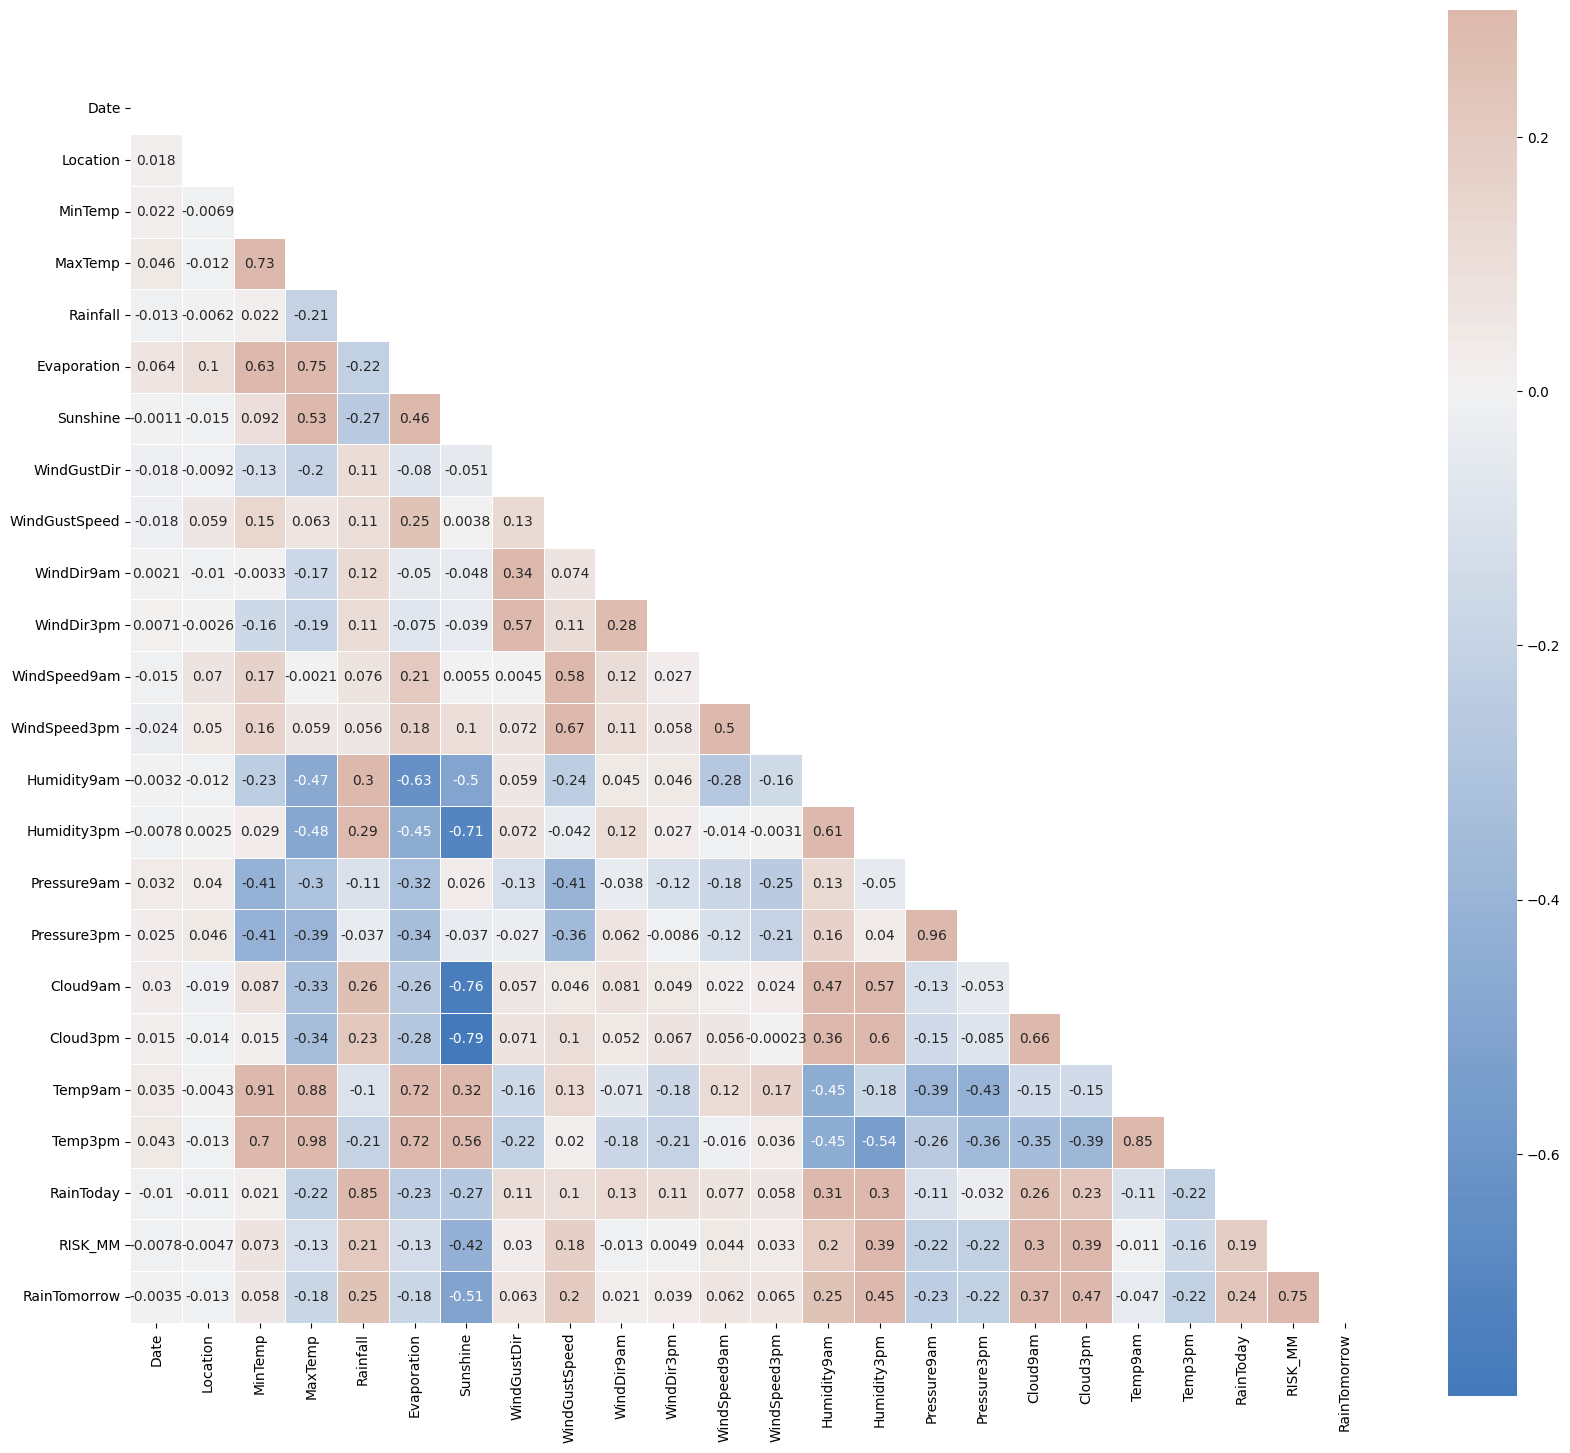

In [26]:
## corelation heapmap
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .9})

In [27]:
# sns.pairplot(MiceImputed, diag_kind='kde', hue="RainTomorrow", palette="husl")

In [28]:
from sklearn.preprocessing import StandardScaler
r_scaler = StandardScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), columns=MiceImputed.columns)
modified_data.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,-1.729394,-1.528611,0.240534,0.039866,-0.053443,0.398481,0.110502,1.050245,0.426382,1.348377,1.335013,0.830292,0.733750,0.023399,-1.611914,-1.617768,-1.321681,1.382253,0.043403,0.053941,0.110643,-0.474361,-0.624182,-0.804765
1,-1.728263,-1.528611,-0.721061,0.368358,-0.489770,0.363156,1.291857,1.263934,0.426382,-0.209819,1.552071,-1.147522,0.484719,-1.544120,-1.461769,-1.151116,-1.208853,-1.156053,-0.922322,0.102108,0.491365,-0.474361,-0.624182,-0.804765
2,-1.727133,-1.528611,0.160401,0.457947,-0.489770,1.129213,1.524794,1.477622,0.593018,1.348377,1.552071,0.706679,0.982781,-1.892457,-1.211527,-1.633860,-1.063789,-1.121095,-1.199361,0.712228,0.323847,-0.474361,-0.624182,-0.804765
3,-1.726003,-1.528611,-0.432583,0.801370,-0.489770,0.484868,1.370630,-0.872948,-1.239977,0.457979,-1.703800,-0.282228,-1.133985,-1.486063,-1.912203,-0.024715,-0.402940,-1.358129,-1.141759,0.246610,0.826401,-0.474361,-0.286999,-0.804765
4,-1.724872,-1.528611,0.897623,1.443422,0.237442,0.800916,-0.351529,1.050245,0.176428,-1.322815,-0.184394,-0.776682,0.235687,0.662017,-1.061383,-1.118933,-1.498981,0.977159,1.400174,0.198443,1.313725,-0.474361,-0.556745,-0.804765
5,-1.723742,-1.528611,0.432853,1.055204,-0.344328,0.941387,1.246264,1.263934,1.426198,1.348377,1.117955,0.706679,0.733750,-0.905501,-1.561865,-1.376397,-1.595691,-0.769172,-0.886393,0.648005,1.191894,-0.474361,-0.624182,-0.804765
6,-1.722611,-1.528611,0.384773,0.353427,-0.489770,0.942384,1.454323,1.050245,0.926290,1.125777,1.117955,0.830292,0.733750,-1.253838,-1.762058,-1.312031,-1.144380,-1.453404,-1.249956,0.246610,0.537052,-0.474361,-0.624182,-0.804765
7,-1.721481,-1.528611,-0.672981,0.607261,-0.489770,0.441989,1.432779,1.050245,-0.323479,0.680579,1.117955,-0.900295,-0.137860,-1.311895,-1.762058,-0.700556,-0.838133,-1.229475,-1.082605,-0.042394,0.674112,-0.474361,-0.624182,-0.804765
8,-1.719220,-1.528611,0.192454,1.114930,0.528327,0.676623,1.227992,1.050245,-0.906705,0.235380,0.466781,0.212225,-0.884954,-0.731332,-1.361672,-1.730409,-1.547336,-0.819839,-0.762204,0.567726,1.085292,2.144410,-0.624182,-0.804765
9,-1.714699,-1.528611,0.112321,-0.243831,2.128193,0.167014,-0.222668,0.836557,0.426382,1.348377,0.683839,1.324746,0.235687,-0.324939,-0.560900,-2.663713,-2.175948,0.569870,0.966918,-0.122673,-0.193935,2.144410,-0.624182,-0.804765


In [30]:
## feature scaling 
from sklearn.feature_selection import SelectKBest
x = modified_data.loc[:, modified_data.columns != 'RainTomorrow']
y = modified_data.loc[:, modified_data.columns != 'RainTomorrow']
selector = SelectKBest(chi2,k=10)
x_new = selector.fit_transform(x, y)
print(x.columns[selector.get_support(indices=True)])


NameError: name 'chi2' is not defined

In [ ]:
#3 train diff logo
from sklearn.model_selection import train_test_split
features = MiceImputed.drop("RainTomorrow", axis=1)
target = MiceImputed["RainTomorrow"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)